# **菊安酱与菜菜的Python机器学习可视化**

#### <font color='blue'>第六期 时间序列（Time Series）： 39时间序列分解图 & 40多个时间序列图

**注意：无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

### <font color=bule> 39/50 时间序列分解图（Time Series Decomposition Plot）

时间序列分解图显示时间序列分解为趋势，季节和残差分量。  
我们可以从分解后的图形看到更多精确的趋势   

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97%E5%88%86%E8%A7%A3%E5%9B%BE.png' width=500>

### 1. 导入需要的绘图库

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose #季节分解包
from dateutil.parser import parse #日期处理包

**dateutil**   
- python第三方库，可以直接导入`from dateutil.parser import parse`       
- 导入不成功的话，可以用pip安装`pip install python-dateutil`   
- dateutil中的parser包的作用是根据字符串解析成datetime
- 更多信息参考官方文档：https://dateutil.readthedocs.io/en/stable/

### 2.导入数据集

In [17]:
#导入数据集
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv',parse_dates=['date'],index_col=0)

In [18]:
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
df.shape

(144, 1)

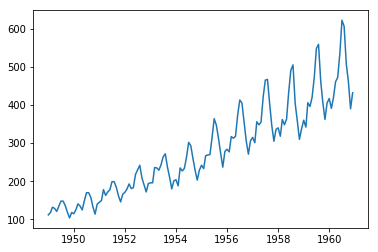

In [20]:
plt.plot(df.value);

### 3.绘制时间序列分解图

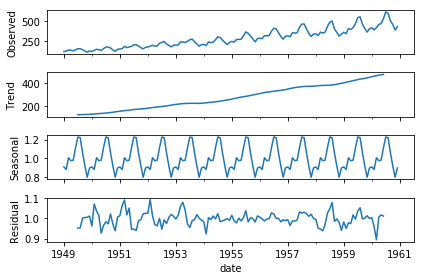

In [31]:
result = seasonal_decompose(df['value'], model='multiplicative')
result.plot();

#### 源码解读

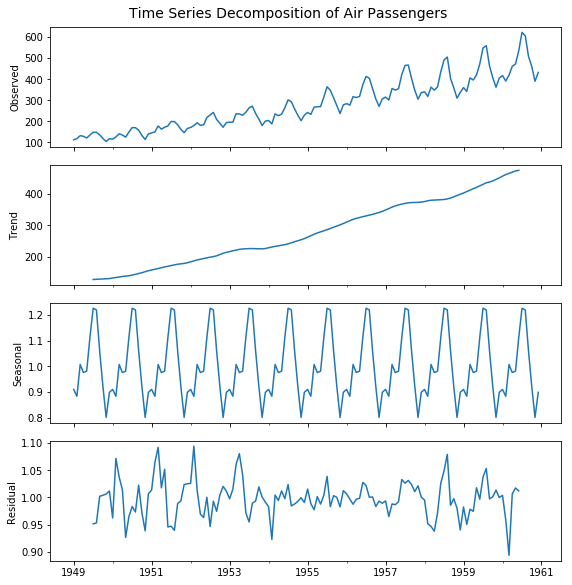

In [59]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv') #导入数据集
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']]) #生成一列时间序列索引
df.set_index(dates, inplace=True) #重置df的索引，将其变为时间序列

# Decompose 
result = seasonal_decompose(df['value'], model='multiplicative') #分解时间序列

# Plot
plt.rcParams.update({'figure.figsize': (8,8)}) #设置画布大小
result.plot().suptitle('Time Series Decomposition of Air Passengers',fontsize=14,x=0.5,y=1.01) #绘制图形并添加总图的标题
plt.show()#本地显示图形

### 4.图形解读   

### <font color=bule> 40/50 多个时间序列图（Multiple Time Series）  

将多个时间序列绘制在同一个图中

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/%E5%A4%9A%E4%B8%AA%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97%E5%9B%BE.png' width=600>

### 1.导入相应的绘图包

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.tsa.stattools as stattools  

### 2.解读源代码

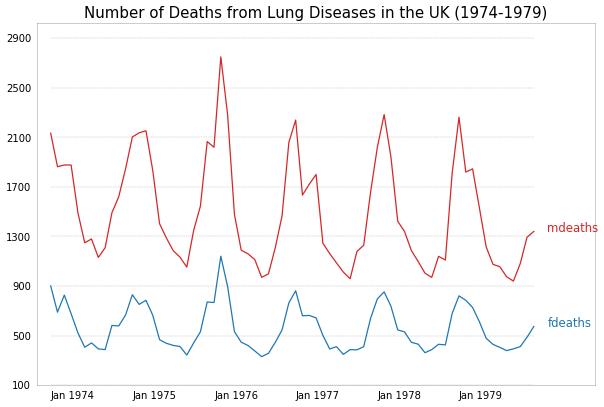

In [79]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv') #导入数据集

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100   #Y轴刻度下限      
y_UL = int(df.iloc[:, 1:].max().max()*1.1) #Y轴刻度上限
y_interval = 400 #Y轴刻度步长
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange'] #颜色列表   

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(12, 8), dpi= 60)#创建画布

columns = df.columns[1:]  #提取所有有效特征（除日期列）
for i, column in enumerate(columns):  #对每一个特征进行循环绘图  
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])   #绘制每个特征的折线图 
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i]) #在折线末端添加特证名

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5) #在Y轴每个刻度上绘制一条横的背景线

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False,   
                 labelbottom=True, labelleft=True)   #设定刻度显示方式，这里只显示下标签和左标签     

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)    #弱化上边框
plt.gca().spines["bottom"].set_alpha(.3) #弱化下边框
plt.gca().spines["right"].set_alpha(.3)  #弱化右边框
plt.gca().spines["left"].set_alpha(.3)   #弱化左边框

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=18) #添加标题
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12) #设定Y轴刻度标签   
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    #设定X轴刻度标签
plt.ylim(y_LL, y_UL) #设定Y轴刻度范围   
plt.xlim(-2, 80)     #设定X轴刻度范围
plt.show() #本地显示图形

### 4.图像解读

In [80]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv',parse_dates=['date'],index_col=0)

In [81]:
df.head()

,mdeaths,fdeaths
date,,
1974-01-01,2134,901
1974-02-01,1863,689
1974-03-01,1877,827
1974-04-01,1877,677
1974-05-01,1492,522


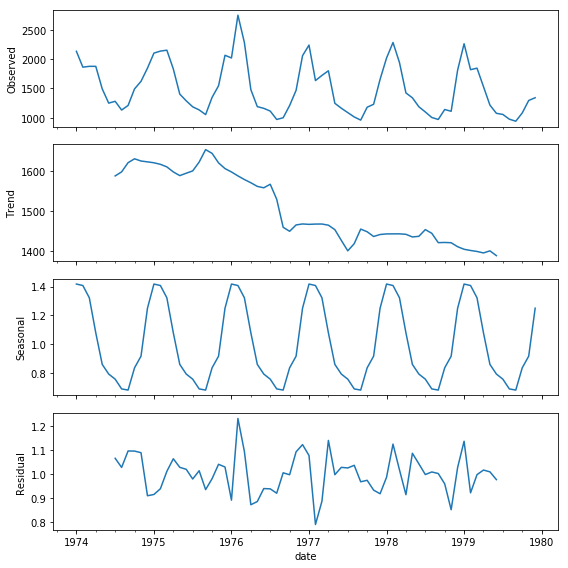

In [82]:
mdeaths = seasonal_decompose(df['mdeaths'], model='multiplicative')
mdeaths.plot();

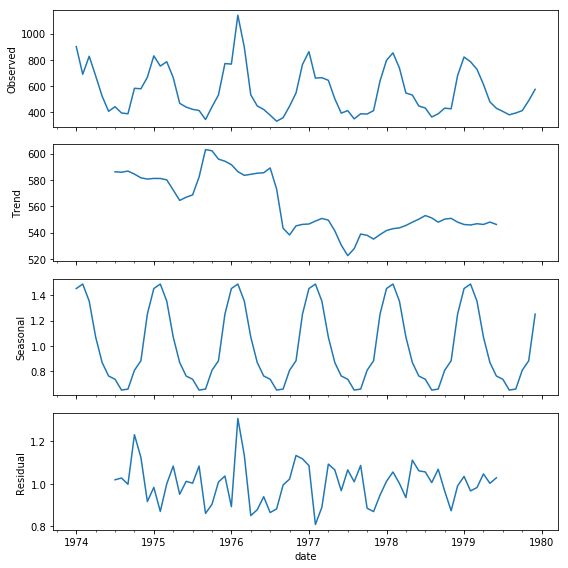

In [83]:
fdeaths = seasonal_decompose(df['fdeaths'], model='multiplicative')
fdeaths.plot();